In [11]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *

In [5]:
def ecit_simu(n_list=[100,500,1000,2000,4000,8000],
              t=100,
              cit=kcit,
              ensembles=[(p_stable,1), (p_stable,4)],
              show_progress=True):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for _ in iteration_loop:

                dataI = np.hstack((generate_samples(n=n,indp='C')))
                dataII = np.hstack((generate_samples(n=n,indp='Nc')))

                obj_ECIT = ECIT(dataI, cit, p_ensemble, k)
                pI = obj_ECIT([0], [1], [2])
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k)
                pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append(np.array([eI, eII, tim]))

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = eI + eII

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII, label=label)
        ax_eSum.plot(n_list, eSum, label=label)
        ax_tim.plot(n_list, tim, label=label)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

Ensemble (k=2, p_stable)


n=1000: 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


Ensemble (k=4, p_stable)


n=1000: 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


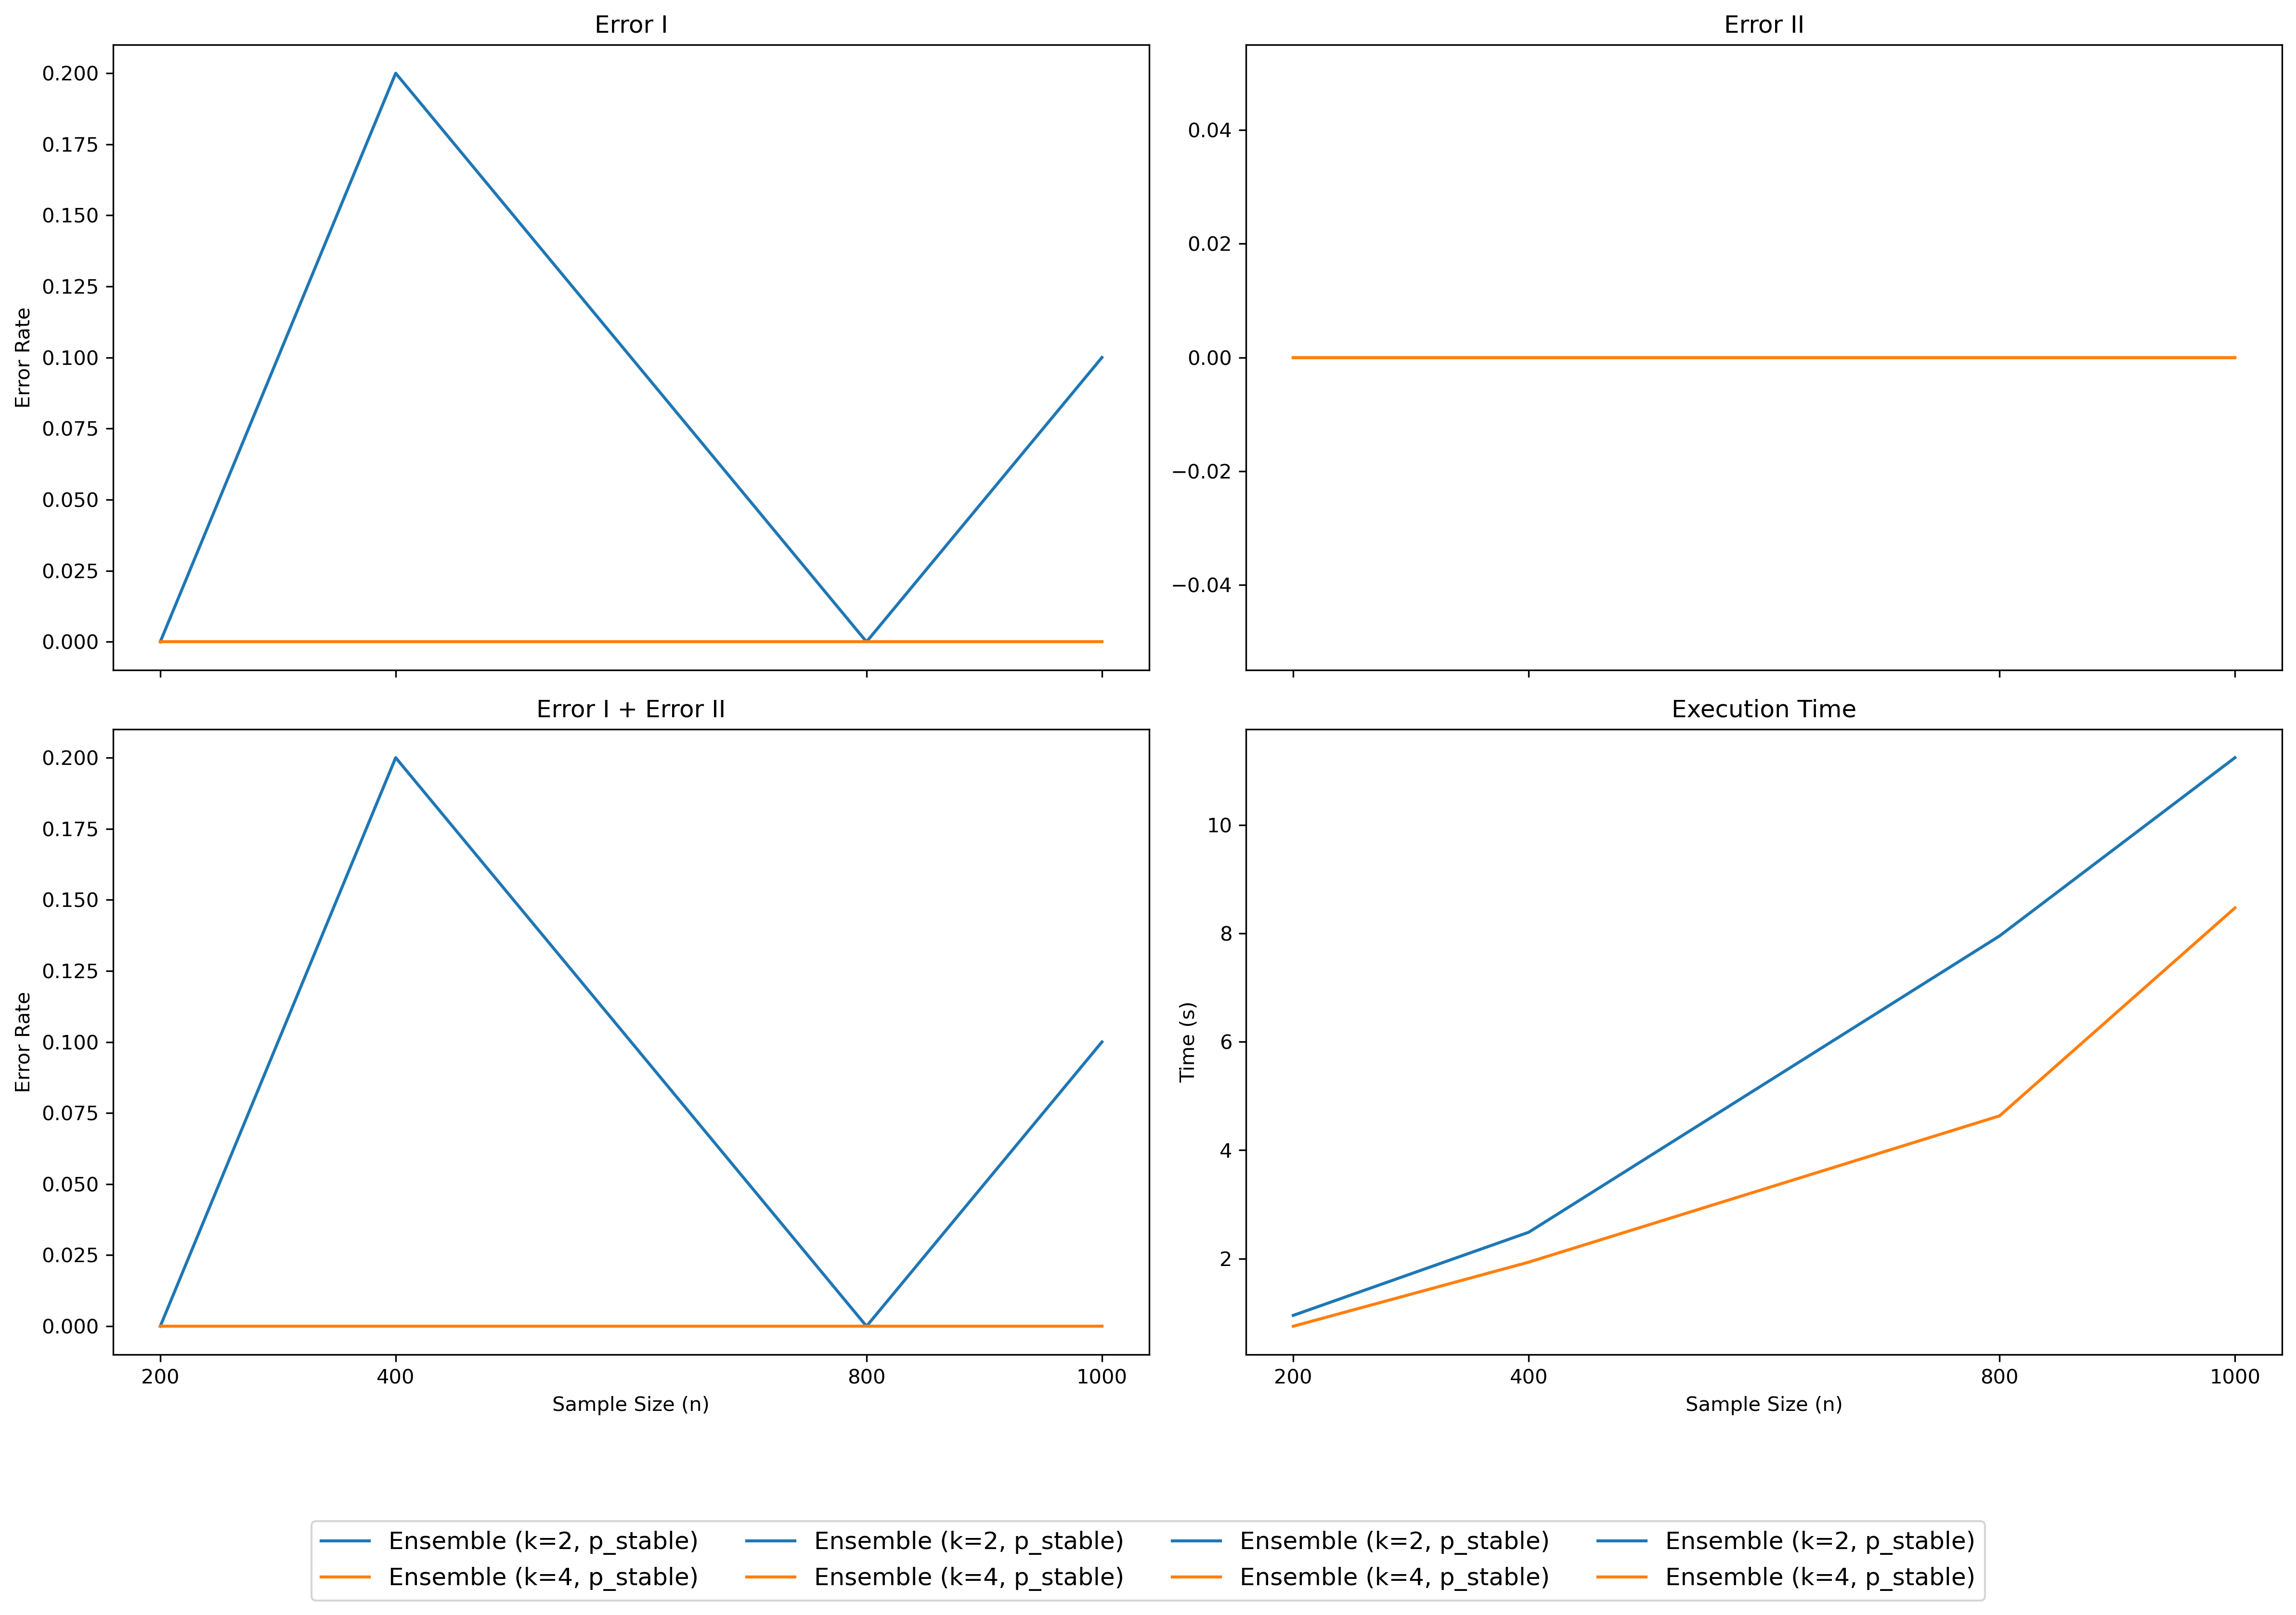

In [8]:
n_list = [200, 400, 800, 1000]
ensembles = [(p_stable, 2), (p_stable, 4)]
t = 10
cit = kcit

results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles)

show_results(results, ensembles, n_list)

In [9]:
save_dict = {
    f"n_list": np.array(n_list),
}
for (p_ensemble, k), result in zip(ensembles, results):
    key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
    save_dict[key_name] = result

np.savez("Expt.ecit.npz", **save_dict)

| **N**  | **Method**  | noise1, fun1 |             |             | noise2, fun2 |             |             | noise3, fun3 |             |             |
|--------|-------------|--------------|-------------|-------------|--------------|-------------|-------------|--------------|-------------|-------------|
|        |             | **Type I**       | **Type II** | **Overall** | **Type I**       | **Type II** | **Overall** | **Type I**       | **Type II** | **Overall** |
| 200    | KCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble KCIT    |                |             |             |                |              |             |                |              |             |
| 200    | CMIknn         |                |             |             |                |              |             |                |              |             |
|        | Ensemble CMIknn    |                |             |             |                |              |             |                |              |             |
| 200    | NNSCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble NNSCIT    |                |             |             |                |              |             |                |              |             |
| 500    | KCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble KCIT    |                |             |             |                |              |             |                |              |             |
| 500    | CMIknn         |                |             |             |                |              |             |                |              |             |
|        | Ensemble CMIknn    |                |             |             |                |              |             |                |              |             |
| 500    | NNSCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble NNSCIT    |                |             |             |                |              |             |                |              |             |
| 1000    | KCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble KCIT    |                |             |             |                |              |             |                |              |             |
| 1000    | CMIknn         |                |             |             |                |              |             |                |              |             |
|        | Ensemble CMIknn    |                |             |             |                |              |             |                |              |             |
| 1000    | NNSCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble NNSCIT    |                |             |             |                |              |             |                |              |             |
| 2000    | KCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble KCIT    |                |             |             |                |              |             |                |              |             |
| 2000    | CMIknn         |                |             |             |                |              |             |                |              |             |
|        | Ensemble CMIknn    |                |             |             |                |              |             |                |              |             |
| 2000    | NNSCIT         |                |             |             |                |              |             |                |              |             |
|        | Ensemble NNSCIT    |                |             |             |                |              |             |                |              |             |

In [ ]:
n_list = [200, 500, 1000, 2000, 4000, 8000]
ensembles = [(p_stable, 1), (p_stable, 4)]
t = 50
cit = kcit

results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles)